In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from textblob import TextBlob
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
import seaborn as sns
import numpy as np




In [49]:
data = pd.read_csv("T_13335.csv")

In [50]:
data.head()

,Tweets,Class
0,NSW has now recorded 18 COVID-19 deaths as the...,0
1,"Pandemic, shops and manufacturing units closed...",0
2,Pandemic The 23-year-old man discharged from t...,1
3,Pandemic The stillness which had become so muc...,1
4,Pandemic Health authorities have confirmed tha...,1


In [51]:
data.shape

(13335, 2)

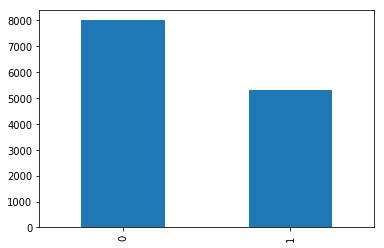

In [52]:
data['Class'].value_counts().plot(kind='bar')

In [53]:
data.isna()

,Tweets,Class
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
13330,False,False
13331,False,False
13332,False,False
13333,False,False


In [54]:
data = data.dropna(inplace=False)



In [55]:
# Removing any whitespace

data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [56]:
data.head()

,Tweets,Class
0,NSW has now recorded 18 COVID-19 deaths as the...,0
1,"Pandemic, shops and manufacturing units closed...",0
2,Pandemic The 23-year-old man discharged from t...,1
3,Pandemic The stillness which had become so muc...,1
4,Pandemic Health authorities have confirmed tha...,1


In [57]:
data['Tweets'][1]

'Pandemic, shops and manufacturing units closed due to the curfew imposed to stop the spread of coronavirus disease (Covid-19) traders fear economic recovery will be difficult.It is for the first time that all business activity trading and manufacturing has been shut down in the city.When there isno business activity paying these interests is also a big challenge‚Äù said Charanjiv Singh chairman of the Pandemic Beopar Mandal.FACTORY WORKERS ISSUED CURFEW PASSES TO FACILITATE WAGE DISBURSEMENT TO LABOURTo resolve the issue of payment of wages to more than 25000 factory workers in the city the UT administration has started issuing curfew passes to factory officials to allow them to disburse wages.In case there are any problems regarding this we are taking them up on priority basis‚Äù said Harjit Singh Sandhu director industries.Due to restrictions on movement imposed because of the curfew both factory owners and workers have been facing problems , the disbursement of wages.Various indust

In [58]:
#Lower Case

data['Tweets'] = data['Tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))



In [59]:
data['Tweets'][1]

'pandemic, shops and manufacturing units closed due to the curfew imposed to stop the spread of coronavirus disease (covid-19) traders fear economic recovery will be difficult.it is for the first time that all business activity trading and manufacturing has been shut down in the city.when there isno business activity paying these interests is also a big challenge‚äù said charanjiv singh chairman of the pandemic beopar mandal.factory workers issued curfew passes to facilitate wage disbursement to labourto resolve the issue of payment of wages to more than 25000 factory workers in the city the ut administration has started issuing curfew passes to factory officials to allow them to disburse wages.in case there are any problems regarding this we are taking them up on priority basis‚äù said harjit singh sandhu director industries.due to restrictions on movement imposed because of the curfew both factory owners and workers have been facing problems , the disbursement of wages.various indust

In [60]:
## remove punctuation
data['Tweets'] = data['Tweets'].str.replace('[^\w\s]','')

In [61]:
## remove stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Tweets'][1]

'pandemic shops manufacturing units closed due curfew imposed stop spread coronavirus disease covid19 traders fear economic recovery difficultit first time business activity trading manufacturing shut citywhen isno business activity paying interests also big challengeäù said charanjiv singh chairman pandemic beopar mandalfactory workers issued curfew passes facilitate wage disbursement labourto resolve issue payment wages 25000 factory workers city ut administration started issuing curfew passes factory officials allow disburse wagesin case problems regarding taking priority basisäù said harjit singh sandhu director industriesdue restrictions movement imposed curfew factory owners workers facing problems disbursement wagesvarious industry associations taken issue administrationthe ut labour department contacted industrialists factory owners regarding payment wages labourersefforts made ensure remaining labour paid wages earliestäù said senior ut official wishing namedmeanwhile househol

In [62]:
#Checking out top 10 most frequent words
most = pd.Series(' '.join(data['Tweets']).split()).value_counts()[:10]
most

said           12672
coronavirus    12339
new             7008
people          6911
health          5296
covid19         5214
cases           4632
also            3904
government      3833
home            3436
dtype: int64

In [ ]:
pstem = PorterStemmer()
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join([pstem.stem(word) for word in x.split()]))

In [63]:
#make wordcoud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt



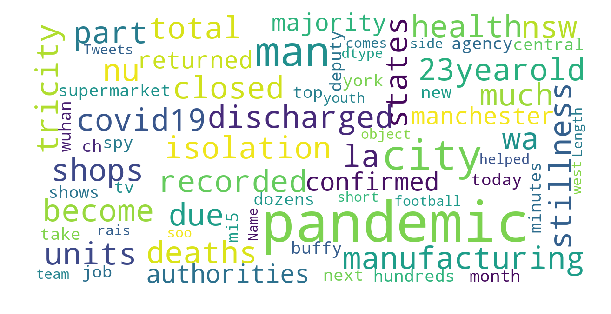

In [65]:
stopwords = set(STOPWORDS)

def display_wordcount(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=1000,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    display_wordcount(data['Tweets'])

In [19]:
# Calculating Sentiment Polairyt and Subjectivity
def senti(x):
    return TextBlob(x).sentiment  
 
data['sentiment_score'] = data['Tweets'].apply(senti)
 
data.sentiment_score.head()

0    (-0.015909090909090907, 0.42613636363636365)
1                  (-0.09375, 0.4520833333333333)
2      (0.26555555555555554, 0.48444444444444446)
3       (0.22499999999999998, 0.3583333333333333)
4      (0.005357142857142858, 0.2130952380952381)
Name: sentiment_score, dtype: object

In [20]:
#Assigning column to sentiment score

data['sentiment_score'][0][0]
data['Polarity'] = data['sentiment_score'].apply(lambda x: x[0])
data['Subjectivity'] = data['sentiment_score'].apply(lambda x: x[1])

In [21]:
data.head(10)

,Tweets,Class,sentiment_score,Polarity,Subjectivity
0,nsw record 18 covid19 death state total number...,0,"(-0.015909090909090907, 0.42613636363636365)",-0.015909,0.426136
1,pandem shop manufactur unit close due curfew i...,0,"(-0.09375, 0.4520833333333333)",-0.093750,0.452083
2,pandem 23yearold man discharg isol ward govern...,1,"(0.26555555555555554, 0.48444444444444446)",0.265556,0.484444
3,pandem still becom much part triciti last two ...,1,"(0.22499999999999998, 0.3583333333333333)",0.225000,0.358333
4,pandem health author confirm major 35 covid19 ...,1,"(0.005357142857142858, 0.2130952380952381)",0.005357,0.213095
5,one number product seen signific price hike lo...,0,"(0.09134199134199135, 0.584102934102934)",0.091342,0.584103
6,ap photopoolalberto pizzolimanila philippin sä...,0,"(0.025000000000000012, 0.3138888888888889)",0.025000,0.313889
7,local tourist pose cross reenact crucifixion j...,1,"(0.20103305785123962, 0.35268595041322315)",0.201033,0.352686
8,covid19 patient waiv confidenti dona z pazzibu...,0,"(-0.022222222222222223, 0.4444444444444445)",-0.022222,0.444444
9,roman cathol priest ride tricycl wear face mas...,0,"(0.37222222222222223, 0.41111111111111115)",0.372222,0.411111


In [22]:
# declaring tf vectoriser and vectorising reviews of bar dataset
tfidf_vect = TfidfVectorizer(min_df=.03)
final_tfidf_bar = tfidf_vect.fit_transform(data['Tweets'].values).toarray()

In [23]:
df = pd.DataFrame(final_tfidf_bar)
# df['Polarity'] = a['Polarity'] 
# df['Subjectivity']= a['Subjectivity']
df['Class']= data['Class']
df


,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,Class
0,0.0,0.185679,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.385267,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0
2,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1
3,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1
4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.121603,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.087661,0.0,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13330,0.0,0.000000,0.0,0.000000,0.142614,0.000000,0.000000,0.0,0.0,0.141099,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0
13331,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.157329,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1
13332,0.0,0.000000,0.0,0.000000,0.000000,0.073536,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.065113,0.000000,0.0,0.526562,0.0,0.0,1
13333,0.0,0.000000,0.0,0.134474,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.086530,0.000000,0.101649,0.084332,0.091849,0.0,0.000000,0.0,0.0,1


In [25]:
#Assigning depenadant and indepandant variables
X1 = df.iloc[:, :-1].values
y1 = df.iloc[:, 436].values

In [26]:
X1

array([[0.        , 0.18567921, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.5265623 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
y1

array([0, 0, 1, ..., 1, 1, 0])

In [124]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.30)


## GaussianNB

In [120]:
# Fitting classifier to the Training set

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train1,y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [121]:

# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)
y_pred1

array([0, 0, 1, ..., 0, 0, 0])

In [116]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, y_pred1)
print('Confusion Matrix of Gaussian NB :')

cm1



Confusion Matrix of Gaussian NB :


array([[1612,  739],
       [ 642, 1008]])

In [117]:
#Calculating Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test1, y_pred1) * 100

65.48362909272682

In [123]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = X_train1 , y = y_train1, cv =10)
acc = accuracies.mean()*100
acc

65.26632967320161

In [122]:
#printing out the result for GNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))
print(accuracy_score(y_test1, y_pred1))


[[1659  730]
 [ 673  939]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2389
           1       0.56      0.58      0.57      1612

    accuracy                           0.65      4001
   macro avg       0.64      0.64      0.64      4001
weighted avg       0.65      0.65      0.65      4001

0.6493376655836041


## Logistic Regression

In [125]:
# Fitting Logistics Reg to the Training Set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train1, y_train1)

/Users/assadnawaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)


In [97]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm1

array([[2006,  437],
       [ 821,  737]])

In [98]:
#Calculating Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test1, y_pred1) * 100

68.5578605348663

In [127]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = X_train1 , y = y_train1, cv =10)
accuracies.mean()

/Users/assadnawaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/assadnawaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/assadnawaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/assadnawaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/assadnawaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

0.6819214276568079

In [44]:
accuracies.std() # to calculate if there was any deviation


0.012946682378380895

In [128]:
#printing out the result for Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))
print(accuracy_score(y_test1, y_pred1))

[[1973  409]
 [ 835  784]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      2382
           1       0.66      0.48      0.56      1619

    accuracy                           0.69      4001
   macro avg       0.68      0.66      0.66      4001
weighted avg       0.68      0.69      0.68      4001

0.6890777305673582


## K Nearest Neighbour

In [46]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski', p =2)
classifier.fit(X_train1,y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)


In [48]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm1

array([[1880,  538],
       [ 850,  733]])

In [49]:
#Calculating Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test1, y_pred1) * 100

65.30867283179205

In [50]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = X_train1 , y = y_train1, cv =10)
accuracies.mean()

0.6401328909760962

In [51]:
# # 10 fold cross validation
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier , X = X_train1 , y = y_train1, cv =10)
# accuracies.mean()

In [52]:
accuracies.std() # to calculate if there was any deviation



0.008608736676779954

In [53]:
#printing out the result for Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))
print(accuracy_score(y_test1, y_pred1))

[[1880  538]
 [ 850  733]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      2418
           1       0.58      0.46      0.51      1583

    accuracy                           0.65      4001
   macro avg       0.63      0.62      0.62      4001
weighted avg       0.64      0.65      0.64      4001

0.6530867283179205


## SVM

In [54]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state=0)
classifier.fit(X_train1,y_train1)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [55]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)




In [56]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm1

array([[1995,  423],
       [ 793,  790]])

In [57]:
#Calculating Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test1, y_pred1) * 100

69.60759810047487

In [58]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = X_train1 , y = y_train1, cv =10)
accuracies.mean()

0.6759222413175139

In [59]:
accuracies.std() # to calculate if there was any deviation




0.016970256403066465

In [60]:
#printing out the result for Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))
print(accuracy_score(y_test1, y_pred1))

[[1995  423]
 [ 793  790]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      2418
           1       0.65      0.50      0.57      1583

    accuracy                           0.70      4001
   macro avg       0.68      0.66      0.67      4001
weighted avg       0.69      0.70      0.69      4001

0.6960759810047488


## Kernel SVM

In [61]:
# Fitting classifier to the Training Set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train1,y_train1)

/Users/assadnawaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [62]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)





In [63]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm1

array([[2418,    0],
       [1583,    0]])

In [64]:
#Calculating Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test1, y_pred1) * 100

60.434891277180704

In [65]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = X_train1 , y = y_train1, cv =5)
accuracies.mean()

/Users/assadnawaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/assadnawaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/assadnawaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/assadnawaz/opt/anacon

0.5985644154037882

In [66]:
accuracies.std() # to calculate if there was any deviation


5.172076361079538e-05

In [67]:
#printing out the result for Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))
print(accuracy_score(y_test1, y_pred1))

[[2418    0]
 [1583    0]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      2418
           1       0.00      0.00      0.00      1583

    accuracy                           0.60      4001
   macro avg       0.30      0.50      0.38      4001
weighted avg       0.37      0.60      0.46      4001

0.604348912771807


/Users/assadnawaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decission tree

In [68]:
# Fitting classifier to the Training set

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3 , criterion = 'entropy',random_state = 0)
classifier.fit(X_test1,y_test1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [69]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)

In [70]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm1

array([[1733,  685],
       [ 747,  836]])

In [71]:
#Calculating Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test1, y_pred1) * 100

64.20894776305923

In [72]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = X_train1 , y = y_train1, cv =10)
accuracies.mean()

0.6039171131595151

In [73]:
#printing out the result for Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))
print(accuracy_score(y_test1, y_pred1))

[[1733  685]
 [ 747  836]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2418
           1       0.55      0.53      0.54      1583

    accuracy                           0.64      4001
   macro avg       0.62      0.62      0.62      4001
weighted avg       0.64      0.64      0.64      4001

0.6420894776305923


## Random Forest

In [74]:
# Fitting classifier to the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy',random_state = 0)
classifier.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [75]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)

In [76]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm1

array([[2027,  391],
       [ 917,  666]])

In [77]:
#Calculating Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test1, y_pred1) * 100

67.30817295676081

In [78]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = X_train1 , y = y_train1, cv =10)
accuracies.mean()

0.656629844409113

In [79]:
#printing out the result for Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))
print(accuracy_score(y_test1, y_pred1))

[[2027  391]
 [ 917  666]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76      2418
           1       0.63      0.42      0.50      1583

    accuracy                           0.67      4001
   macro avg       0.66      0.63      0.63      4001
weighted avg       0.67      0.67      0.66      4001

0.6730817295676081


## XG Boost

In [80]:
## Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [81]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)

In [82]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, y_pred1)
cm1

array([[2095,  323],
       [ 946,  637]])

In [83]:
#Calculating Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test1, y_pred1) * 100

68.28292926768307

In [84]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = X_train1 , y = y_train1, cv =10)
accuracies.mean()

0.6724889946788467

In [85]:
#printing out the result for Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))
print(accuracy_score(y_test1, y_pred1))

[[2095  323]
 [ 946  637]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      2418
           1       0.66      0.40      0.50      1583

    accuracy                           0.68      4001
   macro avg       0.68      0.63      0.63      4001
weighted avg       0.68      0.68      0.66      4001

0.6828292926768308
